# Final project
Canvas link: https://canvas.rice.edu/courses/59073/assignments/352000

Drive with each one's part: https://docs.google.com/document/d/1EI2TKTE2AwL4zmznFjOQUUQVVocn4YYT-2rkVMKewZA/edit

Github: https://github.com/mcgarrity/Neur415Elec588FinalProject


### Dani's part

Goal: Generate a model that crosses several layers of abstraction, starting with a firing rate model for a contrast stimuli, connecting it to a synaptic conductance model for a decision making neuron, and building a psychodynamical curve. 

In our model, we will have a subject that is facing a screen and viewing a grating stimuli at varying levels of contrast intensity to create a psychophysical curve. The reference stimuli will be a contrast of .5, and the test stimuli will be variable. Both stimuli will be presented for 300 ms, and we will make an assumption that the firing rate of the relevant initial sensory neurons will remain constant throughout. Three of these sensory neurons will synapse onto a decision making neuron that will control the behavior of our subject. This neuron will use a synapse conductance model, and its spike count during the 300 ms of presentation will determine how intense the subject experiences the stimuli, and therefore which stimuli the subject reports as bigger in the psychophysical experiment. 

Once the initial psychophysical curve is created, we will introduce TEA into the area around our subject's decision making neuron, reducing the potassium current and doubling the width of our action potentials. We will then examine how this alteration affects behavior.
### Firing Rate Model

Here is where the primary change is, so pay attention.

  Write a homogenous Poisson process firing rate model to simulate three contrast sensitive sensory neurons. The firing rate from the input stimuli should follow the function, where the contrast intensity is defined via Michelson contrast and ranges from [0 1].
    Each trial should last for 300 ms.
    The contrast intensity of each trial will eventually be determined by the needs of the psychometric curve, but initial testing can be done without it.
    Calculating the interspike interval will be more computationally efficient than a full moment-to-moment simulation, but potentially more complicated to code. You may make the choice here.

### Synaptic Conductance Model

   You will have the above 3 neurons synapse onto a synaptic conductance model (as described in section 5.8 of Dayan and Abbott). This model is simply a Hodgkin-Huxley Model with a synaptic conductance term added (and no external current injection providing excitation). Do not try to account for short term plasticity; keep it simple.
    Develop a spike counter to reliably detect how many times this cell spikes during the 300 ms time window.
    Aim to have this neuron spike somewhere between 10 and 40 Hz when contrast is .5. This is tuned by changing the conductance parameter for the synaptic connection. 
    Keep in mind that the above firing rate model doesn't have to be finished to tune the synaptic conductance model.

### Applying TEA

   TEA blocks potassium channels, which should delay repolarization. In your model, this will simply be reducing 

. Modulate this parameter such that the width of an action potential is roughly doubled. Rerun the whole simulation again with this changed parameter, and see how the slope (and possibly the threshold) shift. Plot the two curves on a single chart with a  legend, and briefly explain the differences between the two.

### Psychophysical Curve

   In our experiment, the reference stimuli has a contrast level of .5. The test stimuli should be 8 stimuli approximately evenly spaced from [0 1], with perhaps more focus in the center, as this is where the information is. Two points where the 'subject' gets approximately 100% correct do not give as much information about the shape of the sigmoid curve as when you have one point at 60% correct and one point at 70% correct.
   
   There should be 30 trials for each reference/test pair.
   
   For each reference/test pair, you will calculate the answer to the question "What percentage of the time does the test contrast generate more spikes than the reference contrast?". Based on the assumptions of this model, it is a proxy for "What percentage of the time does the subject believe that the test stimuli is higher contrast than the reference stimuli?"
   
   The percentages for each reference/test pair should be plotted with the x-axis being the test contrast magnitude and the y-axis being the percentage. This should yield a roughly sigmoid curve - for ease, you may use 
    $$f(x) = \frac{1}{1+\exp(-slope \cdot(x-threshold))}$$

   In a perfect world, the threshold should be such that the you have 50% correct at .5 contrast intensity (i.e., the subject is guessing randomly if the test contrast were the same as the reference contrast). This will be slightly off due to stochasticity of the model, and substantial deviations from this would represent systemic bias in our model, likely due to floor effects from the firing rate being too low (this is the common problem we have with being unable to have negative firing rates). If you see substantial bias, try raising the synaptic conductance and trying again. If it continues, email me the code and I'll take a look. 

In [1]:
# Inputs
# Reference stimuli of 0.5
# Stimuli of 0.125 increments evenly spaced from [0, 1]. Perhaps more focus in the center.
# 0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9

# Build 30 trials per reference-test pair.

# The question we are trying to answer:
# "What percentage of the time does the subject believe that the test stimuli is higher contrast than the reference stimuli?"
# i.e. "What percentage of the time does the test contrast generate more spikes than the reference contrast?"

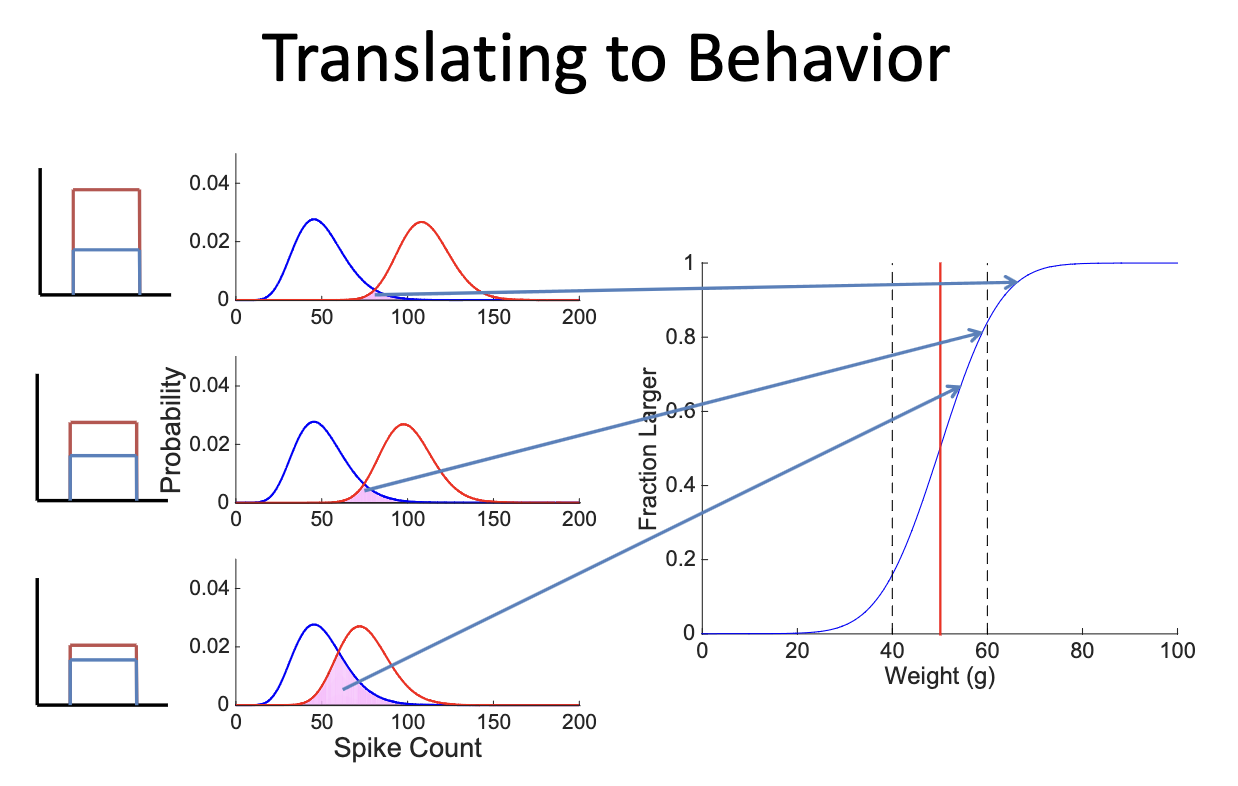

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def dummy_spikes(stimuli=0.5, dt = 0.001, rate=50): # 1 s of data
    length = int(dt**(-1))
    spikes = np.full(length, False) #boolean
    counter = 0
    
    for i in range(length):
        if np.random.rand() < stimuli*np.exp(-rate*dt)*(rate*dt):
            spikes[i] = True
            counter += 1
            
    return [spikes, counter]


def reference_test(stimuli_test=0.5, dt=0.001, rate=50, offset=0.5):
    spikes_test, counter_test = dummy_spikes(stimuli_test, dt, rate)
    spikes_reference, counter_reference = dummy_spikes(0.5, dt, rate)
    return [spikes_test, spikes_reference, (counter_test-counter_reference)/rate+0.5]


def trials_30(stimuli_test=0.5, dt=0.001, rate=20, offset=0.5):
    percentages = np.zeros(30)
    
    for i in range(30):
        spikes_test, spikes_reference, percentage = reference_test(stimuli_test, dt, rate, offset)
        percentages[i] = percentage
    return percentages


def several_stimuli(stimuli_test=[0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9], dt=0.001, rate=20, offset=0.5):
    stimuli_len = len(stimuli_test)
    
    percentages_tests_mean = np.zeros(stimuli_len)
    percentages_tests_stdv = np.zeros(stimuli_len)
    
    for i in range(stimuli_len):
        percentages = trials_30(stimuli_test[i], dt, rate, offset)
        percentages_tests_mean[i] = np.mean(percentages)
        percentages_tests_stdv[i] = np.std(percentages)
        
    return [percentages_tests_mean, percentages_tests_stdv]

In [4]:
spikes, counter = dummy_spikes(0.5)
print(counter)

24


In [5]:
spikes, counter = dummy_spikes(1)
print(counter)

36


0.055000000000000014


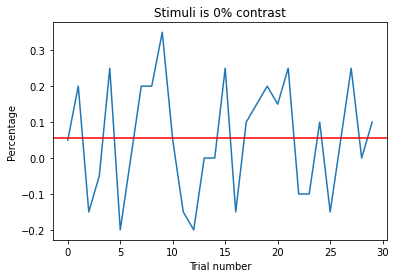

In [6]:
percentages_0 = trials_30(0)
print(np.mean(percentages_0))

plt.plot(percentages_0)
plt.axhline(y=np.mean(percentages_0), c="r")
plt.xlabel("Trial number")
plt.ylabel('Percentage')
plt.title("Stimuli is 0% contrast")
plt.show()

0.5166666666666666


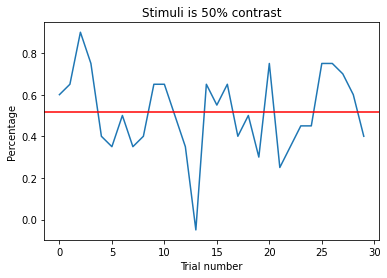

In [7]:
percentages_05 = trials_30(0.5)
print(np.mean(percentages_05))

plt.plot(percentages_05)
plt.axhline(y=np.mean(percentages_05), c="r")
plt.xlabel("Trial number")
plt.ylabel('Percentage')
plt.title("Stimuli is 50% contrast")
plt.show()

In [8]:
stimuli = [0, 0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9]
percentages_tests_mean, percentages_tests_stdv = several_stimuli(stimuli)

In [9]:
def sigmoid(x, slope=5, threshold=0.5):
    argument = -slope*(x-threshold)
    return 1/(1+np.exp(argument))

In [10]:
xx = np.array([0.01*i for i in range(100)])
sig = sigmoid(xx)

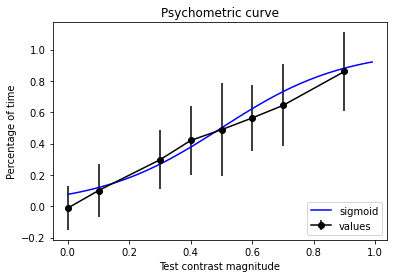

In [11]:
plt.errorbar(stimuli, percentages_tests_mean, yerr=percentages_tests_stdv, c="k", marker="o", label="values")
plt.plot(xx, sig, c="b", label="sigmoid")
plt.legend(loc="lower right")
plt.xlabel("Test contrast magnitude")
plt.ylabel('Percentage of time')
plt.title("Psychometric curve")
plt.show()

### Note: If 0.5 test contrast does not correspond to 50% and there is a large bias, the firing rate might be too low; try raising the synaptic conductance.